In [1]:
%matplotlib inline

import qinfer as qi
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import display, Math, Latex

from scipy.stats import iqr

In [2]:
%run allmyfonts.py

Fonts loaded


In [4]:
%run nv_sensing_lib.py

In [5]:
dire = os.getcwd()
dire = dire+"/test_results/"+"/QHL_sensing_tracking"
#dire = os.path.join("..","Efficient sensing", "Figures", "Figures for paper")
dire = os.path.normpath(dire)
print('Files will be saved in:')
print(dire)

Files will be saved in:
C:\Users\ag15141\Local Documents\Cloud\Dropbox (Qsim)\Qinfer_Sensing\test_results\QHL_sensing_tracking


# Chirp single run

In [601]:
%run nv_sensing_lib.py

0.01, 0.1, 0.00005


In [688]:
# allfreqrates = np.arange(0.001, 0.01, 0.000001)
allfreqrates = np.linspace(0.2, 0.001, 5000)
print(len(allfreqrates))

5000


In [689]:
# allfreqrates = [0.1**(n/10) for n in range(10,50)]

In [690]:
n_particles = 5000

omegabounds = [0, 1]
resample_thresh = 0.4
resample_a =0.92

In [705]:
timestamp = mytimestamp()
output = []

start = time.time()

run = TrackPrecModel(freq_min=omegabounds[0], freq_max=omegabounds[1], n_particles=n_particles, 
                        timedep = "Sin", start = np.array([[0.5]]), freq_rate = allfreqrates[0], amplitude = 0.02)

for idstep in range(int(len(allfreqrates)/2)): 
    
    run.model.freq_rate = allfreqrates[idstep]
    
    if idstep == 0:
        TBC = False
        n_experiments = 1
    else:
        TBC = True
        n_experiments = 1

    output.append(
        run.est_prec(data = None, resample_a = resample_a, resample_thresh = resample_thresh, 
                     n_experiments = n_experiments, verbose=False, TBC=TBC)
          )
        
npoutput=np.array([output])
    
    
print("Done, Elapsed time: " + str(time.time()-start) + " secs")

Done, Elapsed time: 3.494349479675293 secs


In [706]:
convertms = 1/1000
algotimes = np.linspace( 0, 1.86/n_experiments, n_experiments) # in s

est_trajectory = []
true_trajectory = []

for index in range(len( npoutput[0] )):
    true_trajectory.extend( npoutput[0, index, -1] )
    est_trajectory.extend( npoutput[0, index, 0] )

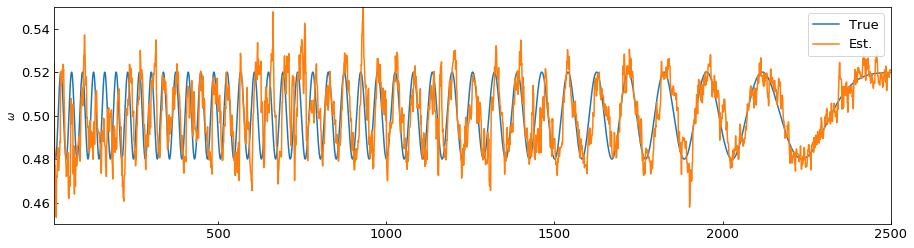

In [707]:
plt.figure(figsize=(15,4))

plt.plot(true_trajectory, label='True')
plt.plot(est_trajectory, label='Est.')
plt.legend(loc='upper right')
# plt.xlabel(r'$\tau$ (ms)')
plt.ylabel(r'$\omega$')

plt.ylim(0.45, 0.55)
plt.xlim(10,2500 )

plt.show()

# Multiple runs (sweep of frequencies)

In [730]:
allfreqrates = np.linspace(0.2, 0.001, 5000)
print(len(allfreqrates))

5000


In [766]:
n_particles = 5000

omegabounds = [0, 1]
resample_thresh = 0.4
resample_a =0.92

timestamp = mytimestamp()

n_runs = 100

omegabounds = [0, 1]

In [768]:
all_trajectories = []

for idrun in range(n_runs):
    
    start = time.time()
    output = []

    run = TrackPrecModel(freq_min=omegabounds[0], freq_max=omegabounds[1], n_particles=n_particles, 
                            timedep = "Sin", start = np.array([[0.5]]), freq_rate = allfreqrates[0], amplitude = 0.02)

    for idstep in range(int(len(allfreqrates)/2)): 

        run.model.freq_rate = allfreqrates[idstep]

        if idstep == 0:
            TBC = False
            n_experiments = 1
        else:
            TBC = True
            n_experiments = 1

        output.append(
            run.est_prec(data = None, resample_a = resample_a, resample_thresh = resample_thresh, 
                         n_experiments = n_experiments, verbose=False, TBC=TBC)
              )

    npoutput=np.array([output])
    new_trajectory = []

    for index in range(len( npoutput[0] )):
        new_trajectory.extend( npoutput[0, index, 0] )
    all_trajectories.append(new_trajectory)

C:\Program Files\Anaconda3\lib\site-packages\qinfer\resamplers.py:349: ResamplerWarning: Liu-West resampling failed to find valid models for 10 particles within 1000 iterations.
  ).format(idxs_to_resample.size, self._maxiter), ResamplerWarning)
C:\Program Files\Anaconda3\lib\site-packages\qinfer\resamplers.py:349: ResamplerWarning: Liu-West resampling failed to find valid models for 25 particles within 1000 iterations.
  ).format(idxs_to_resample.size, self._maxiter), ResamplerWarning)
C:\Program Files\Anaconda3\lib\site-packages\qinfer\resamplers.py:349: ResamplerWarning: Liu-West resampling failed to find valid models for 35 particles within 1000 iterations.
  ).format(idxs_to_resample.size, self._maxiter), ResamplerWarning)
C:\Program Files\Anaconda3\lib\site-packages\qinfer\resamplers.py:349: ResamplerWarning: Liu-West resampling failed to find valid models for 21 particles within 1000 iterations.
  ).format(idxs_to_resample.size, self._maxiter), ResamplerWarning)
C:\Program Files

In [809]:
convertms = 1/1000
algotimes = np.linspace( 0, 1.86/len(output), len(output)) # in s
times =  np.arange(1, n_experiments*len(output)+1, 1)*convertms + algotimes/convertms

In [769]:
all_trajectories = np.array(all_trajectories)
np.shape(all_trajectories)

In [811]:
true_trajectory = []
for index in range(len( npoutput[0] )):
    true_trajectory.extend( npoutput[0, index, -1] )

errWsup = np.empty(len(true_trajectory))
errWinf = np.empty(len(true_trajectory))

iqrWsup = np.empty(len(true_trajectory))
iqrWinf = np.empty(len(true_trajectory))

mean_trajectory = np.mean(all_trajectories, axis=0), 
med_trajectory = np.median(all_trajectories, axis=0), 

for i in range(len(true_trajectory)):
    iqrWinf[i] = ( 
        iqr(all_trajectories[all_trajectories<med_trajectory], rng=(100-68.27, 100)) )
    iqrWsup[i] = ( 
        iqr(all_trajectories[all_trajectories>med_trajectory], rng=(0, 68.27)) )

for i in range(len(true_trajectory)):
    errWinf[i] = ( 
        np.std(all_trajectories[all_trajectories<mean_trajectory]) )
    errWsup[i] = ( 
        np.std(all_trajectories[all_trajectories>mean_trajectory]) )

final_result = {
        'mean_trajectory' : np.reshape(mean_trajectory, (len(true_trajectory))),
        'med_trajectory' : np.reshape(med_trajectory, (len(true_trajectory))),
        'stdev_trajectory' : np.std(all_trajectories, axis=0), 
        'iqr_trajectory' : iqr(all_trajectories, axis=0, rng=(50-68.27/2, 50+68.27/2)), 
        
        'true_trajectory' : np.array(true_trajectory),
        
        'errWinf': errWinf,
        'errWsup': errWsup,
        'iqrWinf': iqrWinf,
        'iqrWsup': iqrWsup,

        'times': times
    }

# Plotting

In [846]:
axis_font['size'] = 15
rc('xtick', labelsize=15) 
rc('ytick', labelsize=15) 

rc('legend', fontsize=14) 

In [871]:
cm_subsection = np.linspace(0.1, 0.5, 2) 
colors = [cm.plasma(x) for x in cm_subsection]
mycolor = cm.gist_stern(0.65) #colors[0]
truecolor = cm.gist_stern(0.05) #colors[1]

C:\Users\ag15141\Local Documents\Cloud\Dropbox (Qsim)\Qinfer_Sensing\test_results\QHL_sensing_tracking\SinsusoidalSweep_simulation_CHIRPgraph___2018-04-29_19.00.46.pdf


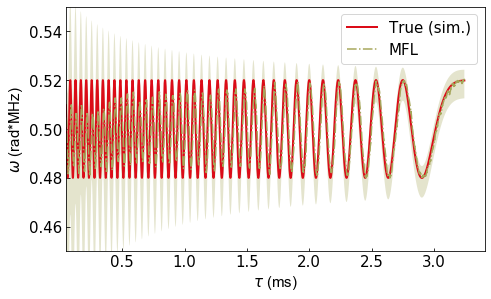

In [877]:
plt.figure(figsize=(4.5*5/3, 4.5))

plt.plot(final_result['times'], final_result['true_trajectory'], color=truecolor, linewidth = 2., label='True (sim.)')
plt.plot(final_result['times'], final_result['mean_trajectory'], color=mycolor, linewidth = 1.5, linestyle = '-.', label='MFL')

plt.fill_between(final_result['times'], 
                 final_result['true_trajectory']+final_result['errWsup'], 
                 final_result['true_trajectory']-final_result['errWinf'],
     alpha=0.3, linewidth=0, facecolor=mycolor, antialiased=True)

plt.legend(loc='upper right', fontsize = axis_font['size'])
plt.xlabel(r'$\tau$ (ms)', **axis_font)
plt.ylabel(r'$\omega$ (rad*MHz)', **axis_font)

plt.ylim(0.45, 0.55)
plt.xlim(0.05, )

thisfile = 'SinsusoidalSweep_simulation'+"_CHIRPgraph__"+timestamp+".pdf"
savefigs(dire, thisfile)

In [861]:
fileformat = '.pk'
thisfile = 'SinsusoidalSweep_simulation'+"_alldata__"+timestamp
savedata(dire, thisfile, sweep_outputs, fileformat)

C:\Users\ag15141\Local Documents\Cloud\Dropbox (Qsim)\Qinfer_Sensing\test_results\QHL_sensing_tracking\SinsusoidalSweep_simulation_alldata___2018-04-26_09.42.13.pk


In [795]:
allfreqrates

array([ 0.001,  0.006,  0.011,  0.016,  0.021,  0.026,  0.031,  0.036,
        0.041,  0.046,  0.051,  0.056,  0.061,  0.066,  0.071,  0.076,
        0.081,  0.086,  0.091,  0.096,  0.101,  0.106,  0.111,  0.116,
        0.121,  0.126,  0.131,  0.136,  0.141,  0.146,  0.151,  0.156,
        0.161,  0.166,  0.171,  0.176,  0.181,  0.186,  0.191,  0.196,
        0.201,  0.206,  0.211,  0.216,  0.221,  0.226,  0.231,  0.236,
        0.241,  0.246,  0.251,  0.256])

In [961]:
thissweep = allfreqrates[20]
print(thissweep)

0.101


In [969]:
est_trajectory = sweep_outputs[thissweep]["medW"]
true_trajectory = sweep_outputs[thissweep]["trueW"]

times = sweep_outputs[thissweep]["simtimes"] + algotimes/convertms

In [970]:
np.max (sweep_outputs[thissweep]["medQL"])

0.013668158533873875

In [992]:
print("w0 = ", np.round(0.5/2/PI, 3), " MHz")

w0 =  0.08  MHz
